In [65]:
import pickle
import numpy as np
from ydata_profiling import ProfileReport
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append("../data/")
from data_getter import get_glocalkd_dataset, get_timeseries

def distance(x, y):
    return np.dot(x, y)

In [88]:
def analyze_distance_matrix(pickle_path, y, dist_name, data_name):
    with open(pickle_path, "rb") as f:
        distance = pickle.load(f)
        
    matrix = distance.distance_matrix
    print(f"number of nans {np.isnan(matrix).sum()}")
    plt.hist(matrix.flatten(), bins=100)
    plt.title("Flattened distance matrix histogram")
    plt.show()
    
    fig, ax = plt.subplots(1, 3, figsize=(20,5))
    for i, statistic in enumerate(["mean", "max", "median"]):
        if statistic == "median":
            vector = np.nanmedian(matrix, axis=1)
        else:
            vector = getattr(matrix, statistic)(axis=1)


        df = pd.DataFrame({"dist_sum": vector, "y":y})
        df.groupby("y").dist_sum.hist(alpha=0.4, legend=True, ax=ax[i])
        ax[i].set_ylim(0,50)
        ax[i].set_xlabel(f"{statistic} distance to all objects")
        ax[i].set_ylabel(f"number of objects")
        ax[i].set_title(f"{dist_name} {statistic} distance for {data_name}")



In [51]:
def get_dataset(data_dir, name, f):
    data = f(data_dir, name)
    return data["X"], data["y"]

In [91]:
data_name = "DD"
X, y = get_dataset("../data/graph", data_name, get_glocalkd_dataset)
#analyze_distance_matrix("../precomputed_distances/p53_function.pickle", y, "dot_product", data_name)

failed to calculate katz_centrality inserting 0
failed to calculate katz_centrality inserting 0
failed to calculate katz_centrality inserting 0


number of nans 0


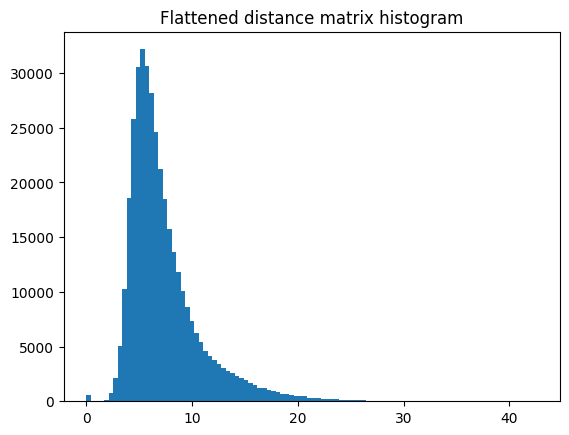

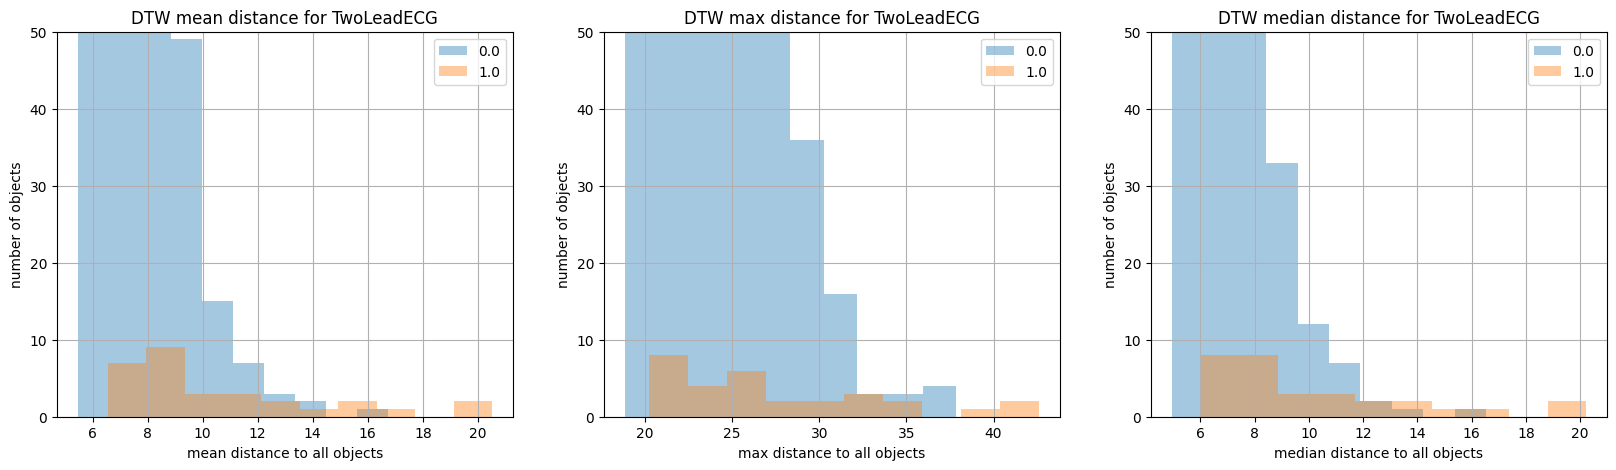

In [89]:
data_name = "TwoLeadECG"
X, y = get_dataset("../data/timeseries", data_name, get_timeseries)

analyze_distance_matrix("../precomputed_distances/TwoLeadECG_DTWDist.pickle", y, "DTW", data_name)